# This program is for predictiong the House price with given variables

In [269]:
# Removing all warnings 
from warnings import filterwarnings
filterwarnings("ignore")

In [270]:
# Import all Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [271]:
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

In [272]:
# Read Training data set
tr = pd.read_csv("C:\Bhushan data\python projects\House price prediction/training_set.csv")
tr.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [273]:
# Read Testing data set
ts_A = pd.read_csv("C:\Bhushan data\python projects\House price prediction/testing_set.csv")
ts_A.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [274]:
tr.shape    # checking the dataframe size

(1460, 81)

In [275]:
tr=tr.drop(labels="Id",axis=1)
ts =ts_A.drop(labels="Id",axis=1)

In [276]:
# In this dataset there are some columns where value is missing but it's meaning is none or NA.
#First we will replace those values with "None"

In [277]:
#List of columns with values specified as "NA"

In [278]:
ListNA = ["Alley","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","GarageType","GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature"]

In [279]:
tr[ListNA].isna().sum()

Alley           1369
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [280]:
#Fill all NA values for above columns wiht "None"

In [281]:
for i in ListNA:
    tr[i]=tr[i].fillna("None")

In [282]:
tr[ListNA].isna().sum()

Alley           0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [283]:
# check the unique values in each column
tr.nunique()

MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               3
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            5
BsmtCond            5
BsmtExposure        5
BsmtFinType1        7
BsmtFinSF1        637
BsmtFinType2        7
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea 

In [284]:
# Create a list of catagorical and continious columns
# we will consider columns with less than 30 uniquw values as catagorical

In [285]:
cat = []
con = []
for i in tr.columns:
    if tr[i].nunique() <30:
        cat.append(i)
    else:
        con.append(i)
#cat,con

In [290]:
con.remove("SalePrice")

In [291]:
# Missing value Treatments
for i in cat:
    x= tr[i].mode()[0]
    tr[i]=tr[i].fillna(x)
    ts[i]=ts[i].fillna(x)
    
for i in con:
    x= tr[i].mean()
    tr[i]=tr[i].fillna(x)
    ts[i]=ts[i].fillna(x)

In [19]:
#tr.isna().sum()

In [20]:
# # In the catagorical columns there are some columns which are ordinal.
# we need to encode them as ordinal columnn

In [292]:
#List of ordinal columns
List_ordinal = ["LotShape","LandSlope","ExterQual","ExterCond","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","HeatingQC","KitchenQual","Functional","FireplaceQu","GarageFinish","GarageQual","PavedDrive","PoolQC","Fence","Electrical"]

In [293]:
#cat,con,List_ordinal

In [294]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()

In [295]:
Q=pd.DataFrame(ss.fit_transform(tr[con]),columns=con)
Q

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch
0,-0.229372,-0.207142,1.050994,0.878668,0.511418,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,0.370333,1.021157,0.351000,-0.752176,0.216503,-0.359325,-0.270208
1,0.451936,-0.091886,0.156734,-0.429577,-0.574410,1.171992,-0.288653,-0.641228,0.466465,0.257140,-0.795163,-0.482512,-0.104483,-0.060731,1.626195,-0.704483,-0.359325,-0.270208
2,-0.093110,0.073480,0.984752,0.830215,0.323060,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,1.189351,0.515013,0.937776,0.631726,-0.752176,-0.070361,-0.359325,-0.270208
3,-0.456474,-0.096897,-1.863632,-0.720298,-0.574410,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,0.937276,0.383659,0.812705,0.790804,-0.752176,-0.176048,4.092524,-0.270208
4,0.633618,0.375148,0.951632,0.733308,1.364570,0.463568,-0.288653,-0.174865,0.199680,-0.045611,1.617877,1.299326,0.896086,1.698485,0.780197,0.563760,-0.359325,-0.270208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.365633,-0.260560,0.918511,0.733308,-0.574410,-0.973018,-0.288653,0.873321,-0.238122,-0.542435,0.795198,0.250402,0.854395,-0.060731,-0.752176,-0.100558,-0.359325,-0.270208
1456,0.679039,0.266407,0.222975,0.151865,0.084843,0.759659,0.722112,0.049262,1.104925,2.355701,-0.795163,1.061367,-0.021102,0.126420,2.033231,-0.704483,-0.359325,-0.270208
1457,-0.183951,-0.147810,-1.002492,1.024029,-0.574410,-0.369871,-0.288653,0.701265,0.215641,0.065656,1.844744,1.569647,-1.563645,-1.033914,-0.752176,0.201405,-0.359325,-0.270208
1458,-0.093110,-0.080160,-0.704406,0.539493,-0.574410,-0.865548,6.092188,-1.284176,0.046905,-0.218982,-0.795163,-0.832788,-1.188432,-1.090059,2.168910,-0.704483,1.473789,-0.270208


In [296]:
out = []
for i in con:
    out = out + list(Q[(Q[i]>3)|(Q[i]<-3)].index)
out
out= list(np.unique(out))
len(out)

249

In [297]:
tr=tr.drop(index=out,axis=0)

In [298]:
tr.index = range(0,tr.shape[0])

In [299]:
ordi = tr[List_ordinal]

In [300]:
len(List_ordinal)

19

In [303]:
# con.remove("SalePrice")

In [304]:
Y = tr[["SalePrice"]]

In [305]:
X=tr.drop(labels="SalePrice",axis=1)

In [306]:
x1 = pd.get_dummies(X[cat],columns=cat)
x1_ts = pd.get_dummies(ts[cat],columns=cat)

In [307]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
x2 = pd.DataFrame(mm.fit_transform(X[con]),columns=con)
x2_ts = pd.DataFrame(mm.fit_transform(ts[con]),columns=con)

In [308]:
from sklearn.preprocessing import OrdinalEncoder

In [309]:
list_LotShape     = ['IR3','IR2','IR1','Reg']
list_LandSlope    = ['Sev','Mod','Gtl']
list_ExterQual    = ['Fa','TA','Gd','Ex']
list_ExterCond    = ["Po",'Fa','TA','Gd','Ex']
list_BsmtQual     = ["None",'Fa','TA','Gd','Ex']
list_BsmtCond     = ["None","Po",'Fa','TA','Gd']
list_BsmtExposure = ["None","No",'Mn','Av','Gd']
list_BsmtFinType1 = ['None',"Unf",'LwQ','Rec','BLQ','ALQ','GLQ']
list_BsmtFinType2 = ['None',"Unf",'LwQ','Rec','BLQ','ALQ','GLQ']
list_HeatingQC    = ["Po",'Fa','TA','Gd','Ex']
list_Electrical   = ['Mix','FuseP','FuseF','FuseA','SBrkr']                  
list_KitchenQual  = ['Fa','TA','Gd','Ex']
list_Functional   = ['Sev','Maj2','Maj1','Mod','Min2','Min1','Typ']
list_FireplaceQu  = ["Po",'Fa','TA','Gd','Ex']
list_GarageFinish = ['None','Unf','RFn','Fin']
list_GarageQual   = ["None","Po",'Fa','TA','Gd','Ex']
list_PavedDrive   = ['N','P','Y']
list_PoolQC       = ["None",'Fa','Gd','Ex']
list_Fence        = ['None','MnWw','GdWo','MnPrv','GdPrv']

In [310]:
# ordi_cat = list(['list_LotShape', 'list_LandSlope', 'list_ExterQual', 'list_ExterCond', 'list_BsmtQual',
#        'list_BsmtCond', 'list_BsmtExposure', 'list_BsmtFinType1', 'list_BsmtFinType2',
#        'list_HeatingQC', 'list_KitchenQual', 'list_Functional', 'list_FireplaceQu',
#        'list_GarageFinish', 'list_GarageQual', 'list_PavedDrive', 'list_PoolQC', 'list_Fence',
#        'list_Electrical'])

In [311]:
#  oe = OrdinalEncoder(categories=[['list_LotShape','list_LandSlope','list_ExterQual','list_ExterCond','list_BsmtQual','list_BsmtCond','list_BsmtExposure','list_BsmtFinType1','list_BsmtFinType2','list_HeatingQC','list_Electrical','list_KitchenQual','list_Functional','list_FireplaceQu','list_GarageFinish','list_GarageQual','list_PavedDrive','list_PoolQC','list_Fence']])

In [312]:
oe3 = OrdinalEncoder(categories=[list_LotShape,list_LandSlope,list_ExterQual,list_ExterCond,list_BsmtQual,list_BsmtCond,list_BsmtExposure,list_BsmtFinType1,list_BsmtFinType2,list_HeatingQC,list_KitchenQual,list_Functional,list_FireplaceQu,list_GarageFinish,list_GarageQual,list_PavedDrive,list_PoolQC,list_Fence,list_Electrical])
x3 = pd.DataFrame(oe3.fit_transform(np.array(ordi[['LotShape','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual', 'PavedDrive', 'PoolQC', 'Fence','Electrical']]).reshape(-1,19)),columns=List_ordinal)
x3_ts = pd.DataFrame(oe3.fit_transform(np.array(ts[List_ordinal][['LotShape','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual', 'PavedDrive', 'PoolQC', 'Fence','Electrical']]).reshape(-1,19)),columns=List_ordinal)

In [313]:
mm2 = MinMaxScaler()
x4 = pd.DataFrame(mm2.fit_transform(x3),columns=List_ordinal)
x4_ts = pd.DataFrame(mm2.fit_transform(x3_ts),columns=List_ordinal)

In [317]:
Xnew = x1.join(x2)
Xnew = Xnew.join(x4)

In [318]:
Xnew_ts = x1_ts.join(x2_ts)
Xnew_ts = Xnew_ts.join(x4_ts)

In [319]:
Xnew.shape

(1211, 444)

In [320]:
Xnew_ts.shape

(1459, 436)

In [321]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=42)

In [322]:
from statsmodels.api import add_constant,OLS
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst).fit()

In [323]:
#ols.summary()

In [324]:
ols.rsquared_adj

0.9341801095162732

In [325]:
col_drop = ols.pvalues.sort_values().index[-1]
col_drop

'MiscVal_8300'

In [326]:
adj_r2 = []
temp = ols.rsquared_adj
for i in range (1,280,1):
    Xnew = Xnew.drop(labels=col_drop,axis=1)
    from sklearn.model_selection import train_test_split
    xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=42)
    from statsmodels.api import add_constant,OLS
    xconst = add_constant(xtrain)
    ols = OLS(ytrain,xconst).fit()
    col_drop = ols.pvalues.sort_values().index[-1]
    if col_drop=="const":
        col_drop = ols.pvalues.sort_values().index[-2]
    else:
        col_drop = ols.pvalues.sort_values().index[-1]
    adj_r2.append(ols.rsquared_adj)
    print(i,"\t",col_drop,"\t",round(ols.rsquared_adj,4))

1 	 MiscVal_3500 	 0.9342
2 	 MiscVal_480 	 0.9342
3 	 MiscVal_54 	 0.9342
4 	 3SsnPorch_245 	 0.9342
5 	 RoofMatl_WdShake 	 0.9342
6 	 OverallQual_1 	 0.9342
7 	 BsmtHalfBath_2 	 0.9342
8 	 Foundation_Wood 	 0.9342
9 	 Foundation_CBlock 	 0.9342
10 	 Exterior1st_CBlock 	 0.9343
11 	 Exterior2nd_CBlock 	 0.9343
12 	 Electrical_Mix 	 0.9343
13 	 YrSold_2006 	 0.9343
14 	 LowQualFinSF_420 	 0.9343
15 	 BsmtFinType2_GLQ 	 0.9343
16 	 Neighborhood_Blueste 	 0.9343
17 	 LowQualFinSF_0 	 0.9343
18 	 GarageQual_Po 	 0.9343
19 	 MiscVal_450 	 0.9343
20 	 Condition2_RRAe 	 0.9343
21 	 Exterior1st_VinylSd 	 0.9343
22 	 BedroomAbvGr_4 	 0.9343
23 	 Exterior2nd_Plywood 	 0.9343
24 	 Exterior2nd_MetalSd 	 0.9344
25 	 MasVnrType_BrkCmn 	 0.9345
26 	 CentralAir_Y 	 0.9345
27 	 ExterQual_TA 	 0.9345
28 	 BsmtCond_TA 	 0.9345
29 	 Fireplaces_0 	 0.9345
30 	 3SsnPorch_290 	 0.9345
31 	 TotRmsAbvGrd_10 	 0.9345
32 	 Electrical 	 0.9345
33 	 OverallCond_2 	 0.9345
34 	 OverallCond_6 	 0.9345
35 	 Alley_No

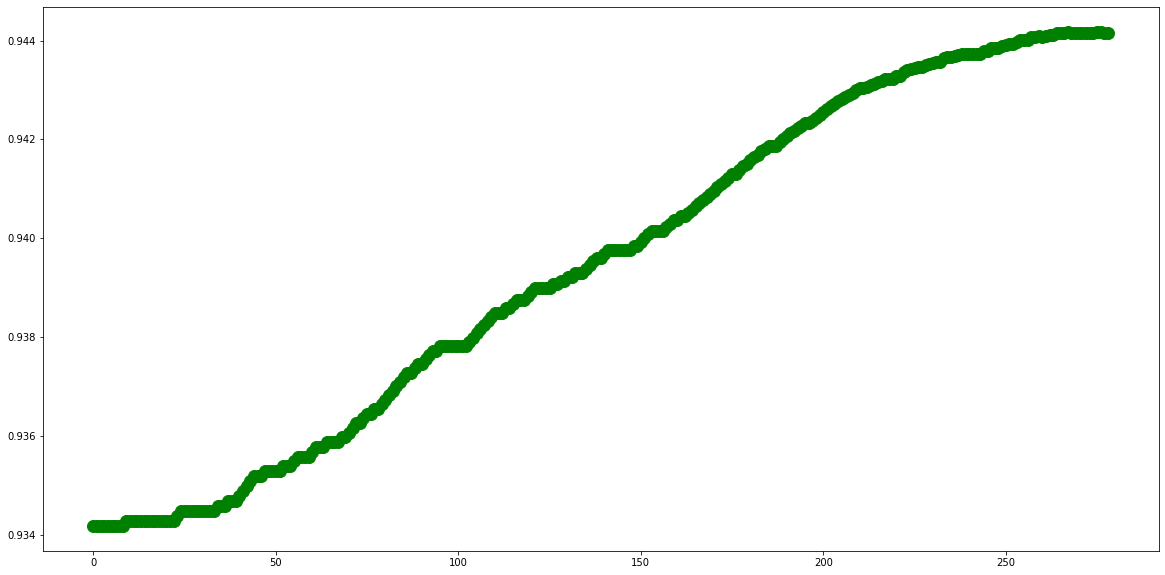

In [327]:
plt.figure(figsize=(20,10))
plt.plot(adj_r2,color='green', marker='o', linestyle='dashed',linewidth=5, markersize=12)

In [161]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
lr = LinearRegression()
rr = Ridge()
la = Lasso()

In [162]:
lr.fit(xtrain,ytrain)
rr.fit(xtrain,ytrain)
la.fit(xtrain,ytrain)

Lasso()

In [163]:
tr_pred_lr = lr.predict(xtrain)
ts_pred_lr = lr.predict(xtest)

tr_pred_rr = rr.predict(xtrain)
ts_pred_rr = rr.predict(xtest)

tr_pred_la = la.predict(xtrain)
ts_pred_la = la.predict(xtest)

In [174]:
from sklearn.metrics import mean_squared_error
tr_err_lr = round(mean_squared_error(ytrain,tr_pred_lr),4)
ts_err_lr = round(mean_squared_error(ytest,ts_pred_lr),4)
print("Linear Regression-->","Training error",ts_err_lr,"\tTesting error",tr_err_lr)

tr_err_rr = round(mean_squared_error(ytrain,tr_pred_rr),4)
ts_err_rr = round(mean_squared_error(ytest,ts_pred_rr),4)
print("Ridge Regression-->","Training error",ts_err_rr,"\tTesting error",tr_err_rr)

tr_err_la = round(mean_squared_error(ytrain,tr_pred_la),4)
ts_err_la = round(mean_squared_error(ytest,ts_pred_la),4)
print("Ridge Regression-->","Training error",ts_err_la,"\tTesting error",tr_err_la)

Linear Regression--> Training error 7.166063062566409e+27 	Testing error 178460512.8216
Ridge Regression--> Training error 406545232.4724 	Testing error 193456770.5737
Ridge Regression--> Training error 468179532.2256 	Testing error 178527567.6717


In [182]:
rr_tr_err = []
rr_ts_err = []
la_tr_err = []
la_ts_err = []

for i in range(1,200):
    p=i*0.01
    
    rr = Ridge(alpha=p)
    la = Lasso(alpha=p)
    
    rr.fit(xtrain,ytrain)
    la.fit(xtrain,ytrain)
    
    tr_pred_rr = rr.predict(xtrain)
    ts_pred_rr = rr.predict(xtest)

    tr_pred_la = la.predict(xtrain)
    ts_pred_la = la.predict(xtest)
    
    tr_err_rr = round(mean_squared_error(ytrain,tr_pred_rr),4)
    ts_err_rr = round(mean_squared_error(ytest,ts_pred_rr),4)
    print("Ridge Regression-->","Training error",ts_err_rr,"\tTesting error",tr_err_rr)

    tr_err_la = round(mean_squared_error(ytrain,tr_pred_la),4)
    ts_err_la = round(mean_squared_error(ytest,ts_pred_la),4)
    print("Ridge Regression-->","Training error",ts_err_la,"\tTesting error",tr_err_la)
    
    rr_tr_err.append(tr_err_rr)
    rr_ts_err.append(ts_err_rr)
    la_tr_err.append(tr_pred_la)
    la_ts_err.append(ts_err_la)

Ridge Regression--> Training error 470057222.0433 	Testing error 178470508.1273
Ridge Regression--> Training error 475356835.9522 	Testing error 178464445.0644
Ridge Regression--> Training error 468215485.0339 	Testing error 178488124.55
Ridge Regression--> Training error 475281600.5026 	Testing error 178464463.9047
Ridge Regression--> Training error 466441813.6681 	Testing error 178516461.0062
Ridge Regression--> Training error 475208708.171 	Testing error 178464494.9818
Ridge Regression--> Training error 464732355.3713 	Testing error 178554761.518
Ridge Regression--> Training error 475135853.8545 	Testing error 178464538.4896
Ridge Regression--> Training error 463083565.0916 	Testing error 178602333.4769
Ridge Regression--> Training error 475063037.5531 	Testing error 178464594.4283
Ridge Regression--> Training error 461492172.7741 	Testing error 178658540.8206
Ridge Regression--> Training error 474990259.2666 	Testing error 178464662.7978
Ridge Regression--> Training error 459955155

Ridge Regression--> Training error 421101487.8515 	Testing error 185411875.2955
Ridge Regression--> Training error 471536891.5647 	Testing error 178482171.8749
Ridge Regression--> Training error 420640082.9626 	Testing error 185585771.25
Ridge Regression--> Training error 471464550.1095 	Testing error 178482847.3512
Ridge Regression--> Training error 420187890.6609 	Testing error 185759818.1932
Ridge Regression--> Training error 471392248.1446 	Testing error 178483535.4533
Ridge Regression--> Training error 419744667.2076 	Testing error 185933986.8854
Ridge Regression--> Training error 471319985.67 	Testing error 178484236.1811
Ridge Regression--> Training error 419310177.6307 	Testing error 186108249.5873
Ridge Regression--> Training error 471247762.6858 	Testing error 178484949.5346
Ridge Regression--> Training error 418884195.3279 	Testing error 186282579.982
Ridge Regression--> Training error 471175579.192 	Testing error 178485675.5138
Ridge Regression--> Training error 418466501.6

Ridge Regression--> Training error 405588565.2509 	Testing error 194275651.6052
Ridge Regression--> Training error 467827500.0824 	Testing error 178534038.3562
Ridge Regression--> Training error 405406558.7501 	Testing error 194438338.7703
Ridge Regression--> Training error 467761077.9441 	Testing error 178535347.1973
Ridge Regression--> Training error 405227533.0219 	Testing error 194600660.0692
Ridge Regression--> Training error 467698254.6541 	Testing error 178536638.8388
Ridge Regression--> Training error 405051435.7475 	Testing error 194762614.542
Ridge Regression--> Training error 467627778.8826 	Testing error 178538034.3188
Ridge Regression--> Training error 404878215.8503 	Testing error 194924201.3491
Ridge Regression--> Training error 467555967.4142 	Testing error 178539408.9156
Ridge Regression--> Training error 404707823.4586 	Testing error 195085419.7663
Ridge Regression--> Training error 467484983.8763 	Testing error 178540784.9915
Ridge Regression--> Training error 404540

Ridge Regression--> Training error 399181153.4462 	Testing error 202251199.6519
Ridge Regression--> Training error 464237343.2699 	Testing error 178619924.9042
Ridge Regression--> Training error 399104740.5073 	Testing error 202395228.2294
Ridge Regression--> Training error 464169192.8881 	Testing error 178621911.9238
Ridge Regression--> Training error 399029668.012 	Testing error 202538924.4816
Ridge Regression--> Training error 464101082.0569 	Testing error 178623911.5594
Ridge Regression--> Training error 398955918.1194 	Testing error 202682289.7669
Ridge Regression--> Training error 464033010.7763 	Testing error 178625923.811
Ridge Regression--> Training error 398883473.3041 	Testing error 202825325.4498
Ridge Regression--> Training error 463964979.0463 	Testing error 178627948.6786
Ridge Regression--> Training error 398812316.3495 	Testing error 202968032.9
Ridge Regression--> Training error 463896986.8668 	Testing error 178629986.1621
Ridge Regression--> Training error 398742430.

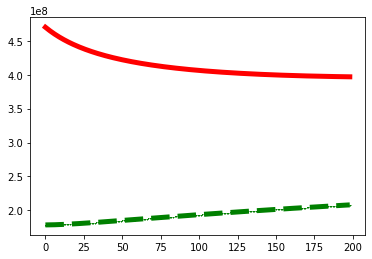

In [328]:
plt.plot(rr_tr_err,color='green', marker='+', linestyle='dashed',linewidth=5, markersize=1)
plt.plot(rr_ts_err,color='red', marker='o', linestyle='solid',linewidth=5, markersize=1)

In [232]:
a = []
for i in range(1,500):
    a.append(round(i*0.01,2))

In [233]:
tg = {
      "alpha": a
     }

In [234]:
from sklearn.model_selection import GridSearchCV
cv1 = GridSearchCV(   
    rr,
    tg,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    refit=True,
    cv=10,
    verbose=1,
    )

In [235]:
model1=cv1.fit(xtrain,ytrain)
model1.best_params_

Fitting 10 folds for each of 499 candidates, totalling 4990 fits


{'alpha': 0.34}

In [236]:
from sklearn.model_selection import GridSearchCV
cv2 = GridSearchCV(   
    la,
    tg,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    refit=True,
    cv=10,
    verbose=1,
    )

In [237]:
model2 = cv2.fit(xtrain,ytrain)

Fitting 10 folds for each of 499 candidates, totalling 4990 fits


In [238]:
model2.best_params_

{'alpha': 2.79}

In [378]:
    rr = Ridge(alpha=0.34)
    la = Lasso(alpha=2.97)
    
    rr.fit(xtrain,ytrain)
    la.fit(xtrain,ytrain)
    
    tr_pred_rr = rr.predict(xtrain)
    ts_pred_rr = rr.predict(xtest)

    tr_pred_la = la.predict(xtrain)
    ts_pred_la = la.predict(xtest)
    
    tr_err_rr = round(mean_squared_error(ytrain,tr_pred_rr),4)
    ts_err_rr = round(mean_squared_error(ytest,ts_pred_rr),4)
    print("Ridge Regression-->","Training error ",ts_err_rr/10e4,"\tTesting error ",tr_err_rr/10e4)

    tr_err_la = round(mean_squared_error(ytrain,tr_pred_la),4)
    ts_err_la = round(mean_squared_error(ytest,ts_pred_la),4)
    print("Lasso Regression-->","Training error ",ts_err_la/10e4,"\tTesting error ",tr_err_la/10e4)
    

Ridge Regression--> Training error  5812.836726352 	Testing error  1976.82810631
Lasso Regression--> Training error  6054.167625293 	Testing error  1941.381228037


In [379]:
import xgboost as xgb
reg = xgb.XGBRegressor(objective='reg:squarederror', 
                        max_depth=5, 
                        learning_rate=0.1,
                        n_estimators=100,
                        subsample=0.8,
                        colsample_bytree=0.8,
                        reg_alpha=0.1,
                        reg_lambda=1,
                        gamma=0,
                        min_child_weight=1,
                        random_state=42)

In [386]:
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor (rr, n_estimators= 1000,learning_rate=0.001,loss='square',random_state=42)
model = abr.fit(xtrain,ytrain)

In [387]:
    tr_pred_abr = abr.predict(xtrain)
    ts_pred_abr = abr.predict(xtest)
    
    tr_err_abr = round(mean_squared_error(ytrain,tr_pred_abr),4)
    ts_err_abr = round(mean_squared_error(ytest,ts_pred_abr),4)
    print("Adaboost Regression-->","Training error ",ts_err_abr/10e4,"\tTesting error ",tr_err_abr/10e4)


Adaboost Regression--> Training error  6244.106168645 	Testing error  1994.318649197


In [330]:
rr = Ridge(alpha=0.34)
final_model= rr.fit(Xnew,Y)

In [348]:
for i in Xnew.columns:
    if i not in Xnew_ts.columns:
        Xnew_ts[i] = 0

In [349]:
for i in Xnew_ts.columns:
    if i not in Xnew.columns:
        Xnew_ts = Xnew_ts.drop(labels=i,axis=1)

In [350]:
Xnew_ts.shape

(1459, 165)

In [351]:
Xnew.shape

(1211, 165)

In [356]:
prediction = final_model.predict(Xnew_ts)

In [357]:
Submission = ts_A[["Id"]]

In [358]:
Submission["Predicted_Value"] = prediction

In [359]:
Submission

,Id,Predicted_Value
0,1461,-14659.958093
1,1462,-6367.988276
2,1463,80537.063931
3,1464,-37201.976433
4,1465,45773.603321
...,...,...
1454,2915,-18188.214168
1455,2916,-26393.394601
1456,2917,-9125.460687
1457,2918,-20407.531788
